# Sprawozdanie z Metod Inteligencji Obliczeniowej
# Laboratorium 7
## Małgorzata Makieła
### 21.04.2024

## Zadanie 1.
Dane z pliku 'customers_mall.csv', zawierające dane o rocznym przychodzie oraz punktowej ocenie wydatków klientów, przedstawiłam na dwóch wykresach - na pierwszym z nich został dokonany podział na 4 klastry , a na drugim na 5 klastrów. W obu przypadkach użyłam algorytmu k-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '5 clusters')

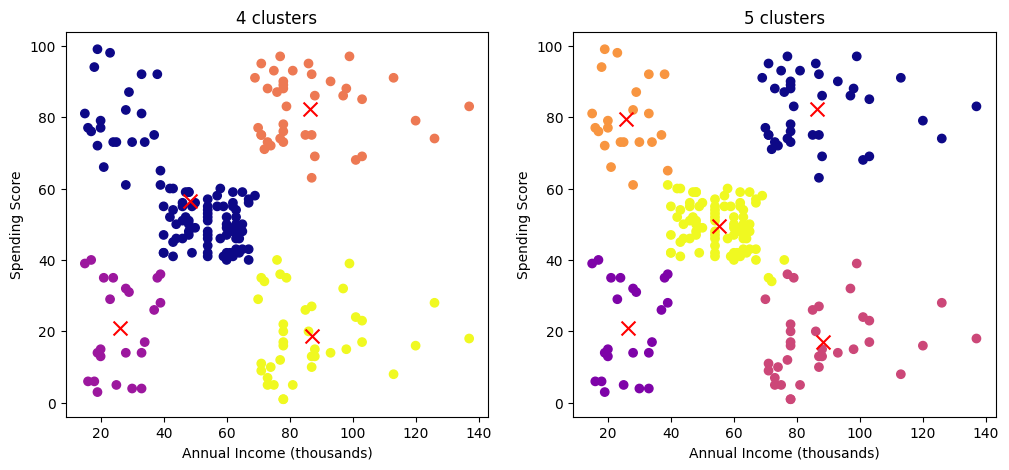

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("customers_mall.csv")
data = df.values

model = KMeans(n_clusters=4)
model.fit(data)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.scatter(data[:, 0], data[:, 1], c=model.labels_, cmap='plasma')
ax1.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', s=100, c='red')
ax1.set_xlabel('Annual Income (thousands)')
ax1.set_ylabel('Spending Score')
ax1.set_title('4 clusters')

model = KMeans(n_clusters=5)
model.fit(data)

ax2.scatter(data[:, 0], data[:, 1], c=model.labels_, cmap='plasma')
ax2.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', s=100, c='red')
ax2.set_xlabel('Annual Income (thousands)')
ax2.set_ylabel('Spending Score')
ax2.set_title('5 clusters')

### Wnioski
Algorytm k-means dobrze poradził sobie z podziałem zbioru na klastry. Wydaje mi się, że najsensowniejszy podział wyszedł przy 5 klastrach - ewidentnie widać podział na 5 oddzielnych zbiorów. Przy podziale na 4 klastry zbiór środkowy i lewy górny łączą się w jedno. Jest to również akceptowalne rozwiązanie, jednak podział na 5 podzbiorów ma zauważalnie lepiej wydzielone granice między zbiorami.

## Zadanie 2.
W zadaniu drugim wczytałam dane z pliku 'planets.csv' i usunęłam pierwszą kolumnę zawierającą nazwę planety, bo nie jest to wartość numeryczna i nie przyda nam się do analizy. Następnie użyłam trzech metod klasteryzacji aby podzielić zbiór planet:

*   Algorytm k-means
*   Agglomerative clustering - klasteryzacja hierarchiczna
* Algorytm DBSCAN



In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('planets.csv')
df.drop('pl_name', axis=1, inplace=True)
scaler = StandardScaler()
data = scaler.fit_transform(df)

# k-means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data)

print("K-means, 2 klastry:")
print(np.unique(kmeans_labels, return_counts=True))
silhouette = silhouette_score(data, kmeans_labels)
print("Silhouette Score dla K-means:", round(silhouette,2))
davies_bouldin = davies_bouldin_score(data, kmeans_labels)
print("Davies-Bouldin Index dla K-means:", round(davies_bouldin,2), "\n")

# Klasteryzacja hierarchiczna (Agglomerative Clustering)
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_cluster.fit_predict(data)

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan_labels = dbscan.fit_predict(data)

print("Agglomerative Clustering:")
print(np.unique(agg_labels, return_counts=True))
silhouette = silhouette_score(data, agg_labels)
print("Silhouette Score dla Agglomerative Clustering:", round(silhouette,2))
davies_bouldin = davies_bouldin_score(data, agg_labels)
print("Davies-Bouldin Index dla Agglomerative Clustering:", round(davies_bouldin,2), "\n")

print("DBSCAN:")
print(np.unique(dbscan_labels, return_counts=True))
silhouette = silhouette_score(data, dbscan_labels)
print("Silhouette Score dla DBSCAN:", round(silhouette,2))
davies_bouldin = davies_bouldin_score(data, dbscan_labels)
print("Davies-Bouldin Index dla DBSCAN:", round(davies_bouldin,2), "\n")


K-means, 2 klastry:
(array([0, 1], dtype=int32), array([424, 354]))
Silhouette Score dla K-means: 0.31
Davies-Bouldin Index dla K-means: 1.29 

Agglomerative Clustering:
(array([0, 1]), array([424, 354]))
Silhouette Score dla Agglomerative Clustering: 0.28
Davies-Bouldin Index dla Agglomerative Clustering: 1.35 

DBSCAN:
(array([-1,  0]), array([ 35, 743]))
Silhouette Score dla DBSCAN: 0.57
Davies-Bouldin Index dla DBSCAN: 1.92 



#### Wnioski
Nie jestem pewna, jaki podział tego zbioru jest poprawny. Algorytm DBSCAN, który sam przypisuje dane do zbiorów, wyznaczył tylko jeden klaster (oraz punkty szumu). Algorytmy k-means oraz Agglomerative Clustering dla 2 klastrów dzielą zbiór mniej więcej na pół. Przy większej ilości zadanych klastrów (np 3, 4) algorytmy te do jednego z klastrów dodają bardzo mało punktów (1-5), więc taki klaster uważam za pomijalny, jedynie dla 2 klastrów te podziały są mniej więcej tak samo znaczące. Obie metryki - współczynnik sylwetkowy i Daviesa-Bouldina są dla tych dwóch algorytmów prawie takie same, więc można ich używać zamiennie. Natomiast dla algorytmu DBSCAN współczynnik sylwetkowy jest wyższy co znaczy pewniejsze zakwalifikowanie planet do konkretnych klastrów.



## Zadanie 3.

In [ ]:
!pip install scikit-fuzzy

In [17]:
import skfuzzy as fuzz

data = df.iloc[:, :len(df.columns)//2].values
scaler = StandardScaler()
data_half_scaled = scaler.fit_transform(data)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_half_scaled.T, 2, 2, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)
print("\nWspółczynnik FPC (Fuzzy Partition Coefficient):", fpc)


Współczynnik FPC (Fuzzy Partition Coefficient): 0.8237691315712022


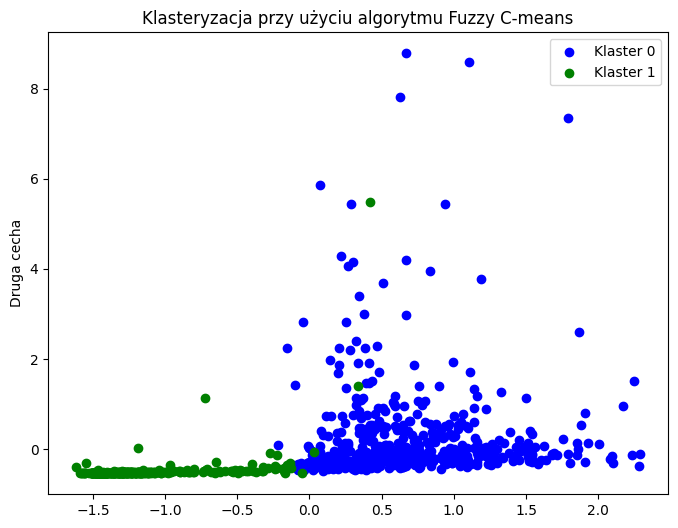

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(2):
    plt.scatter(data_half_scaled[cluster_membership == i, 2],
                data_half_scaled[cluster_membership == i, 3],
                c=colors[i], label=f'Klaster {i}')

plt.title('Klasteryzacja przy użyciu algorytmu Fuzzy C-means')
plt.legend()
plt.show()


## Wnioski
Wybrałam model z 2 klastrami, ponieważ w poprzednim zadaniu na takich bazowałam. Na wykresie pokazałam mniej więcej jak to wygląda w zależności od dwóch cech planety, dla których cokolwiek na tym wykresie było widać.

## Zadanie 4.
Do analizy danych z pliku 'circle.csv' użyłam ponownie 3 metod:

*   Algorytm k-means
*   Agglomerative clustering - klasteryzacja hierarchiczna
*   Algorytm DBSCAN

Zakładam, że poprawny podział tego zbioru to taki, który podzieli zbiór na dwa oddzielne okręgi widoczne na wykresach.

### Metoda 1 - algorytm k-means
dla podziału na 2 oraz 4 klastry.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 klastry
Silhouette Score: 0.35
Davies-Bouldin: 1.19

4 klastry
Silhouette Score: 0.38
Davies-Bouldin: 0.82


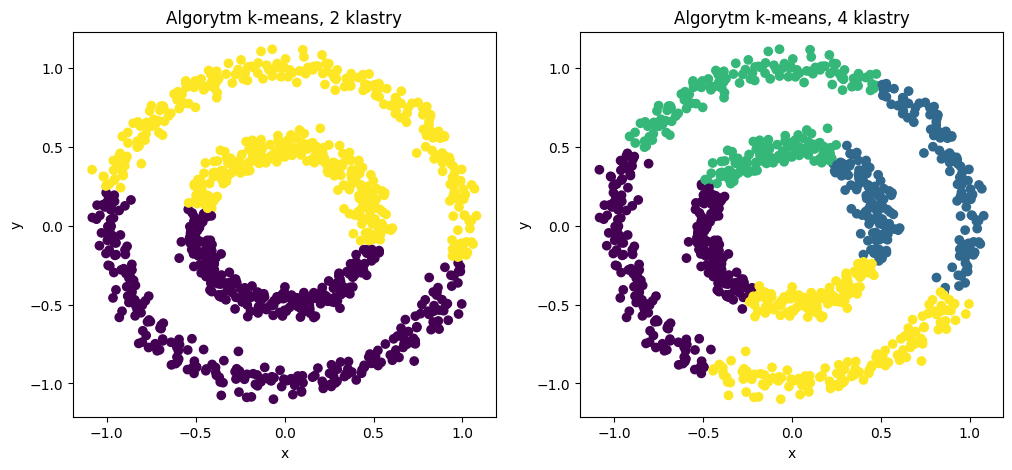

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('circle.csv')
data = df.values

# k-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Algorytm k-means, 2 klastry')

print("2 klastry")
silhouette = silhouette_score(data, kmeans.labels_)
print("Silhouette Score:", round(silhouette, 2))
davies_bouldin = davies_bouldin_score(data, kmeans.labels_)
print("Davies-Bouldin:", round(davies_bouldin,2))
print("")

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

ax2.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Algorytm k-means, 4 klastry')

print("4 klastry")
silhouette = silhouette_score(data, kmeans.labels_)
print("Silhouette Score:", round(silhouette, 2))
davies_bouldin = davies_bouldin_score(data, kmeans.labels_)
print("Davies-Bouldin:", round(davies_bouldin,2))

## Wnioski dla algorytmu k-means
Algorytm widocznie dzieli zbiór na klastry, jednak nie na oddzielne okręgi. Podział nie jest zły, ale nie o taki nam chodziło. Współczynnik sylwetkowy wynosi dla obu przypadków około 0.35, jest to wartość bliższa 0 niż 1, więc znaczy że punkty mogłyby zostać zakwalifikowane do drugiego klastra, a granice między nimi nie są dalekie od siebie (co widać na wykresach - klastry kończą się tuż obok siebie). Współczynnik Daviesa-Bouldina wynosi dla 2 klastrów około 1.2, natomiast dla 4 klastrów 0.8, bliżej zera jest 0.8, i faktycznie dla 4 klastrów zbiory są mniej rozproszone, z racji że jest ich więcej.

### Metoda 2 - klasteryzacja hierachiczna
również dla 2 i 4 klastrów

2 klastry:
Silhouette Score: 0.34
Davies-Bouldin: 1.21

4 klastry
Silhouette Score: 0.35
Davies-Bouldin: 0.84


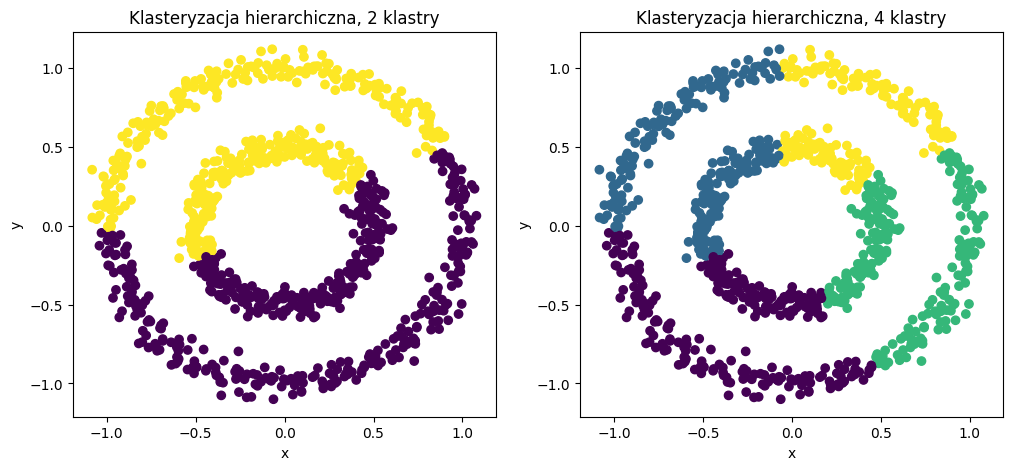

In [5]:
# Klasteryzacja hierarchiczna (Agglomerative Clustering)
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(data)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.scatter(data[:, 0], data[:, 1], c=agg.labels_)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Klasteryzacja hierarchiczna, 2 klastry')

print("2 klastry:")
silhouette = silhouette_score(data, agg.labels_)
print("Silhouette Score:", round(silhouette,2))
davies_bouldin = davies_bouldin_score(data, agg.labels_)
print("Davies-Bouldin:", round(davies_bouldin,2))

agg = AgglomerativeClustering(n_clusters=4)
agg.fit(data)

ax2.scatter(data[:, 0], data[:, 1], c=agg.labels_)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Klasteryzacja hierarchiczna, 4 klastry')

print("\n4 klastry")
silhouette = silhouette_score(data, agg.labels_)
print("Silhouette Score:", round(silhouette,2))
davies_bouldin = davies_bouldin_score(data, agg.labels_)
print("Davies-Bouldin:", round(davies_bouldin,2))

## Wnioski dla klasteryzacji hierarchicznej
Metoda ta zadziałała bardzo podobnie do metody k-means, dzieliąc okręgi przez pół (lub przez 4, na ćwiartki), zamiast na 2 oddzielne okręgi. Współczynnik sylwetkowy wyniósł dla obu przypadków około 0.35, a współczynnik Daviesa-Bouldina wyniósł kolejno 1.2 i 0.8. Wnioski są dokładnie takie same jak dla algorytmu k-means powyżej.

### Metoda 3 - algorytm DBSCAN
Algorytmu użyłam dla kilku wartości epsilon, aby pokazać, dla którego działa najlepiej.


eps =  0.04
Silhouette Score: -0.47
Davies-Bouldin: 1.64

eps =  0.08
Silhouette Score: 0.01
Davies-Bouldin: 1.61

eps =  0.2
Silhouette Score: 0.11
Davies-Bouldin: 170.44


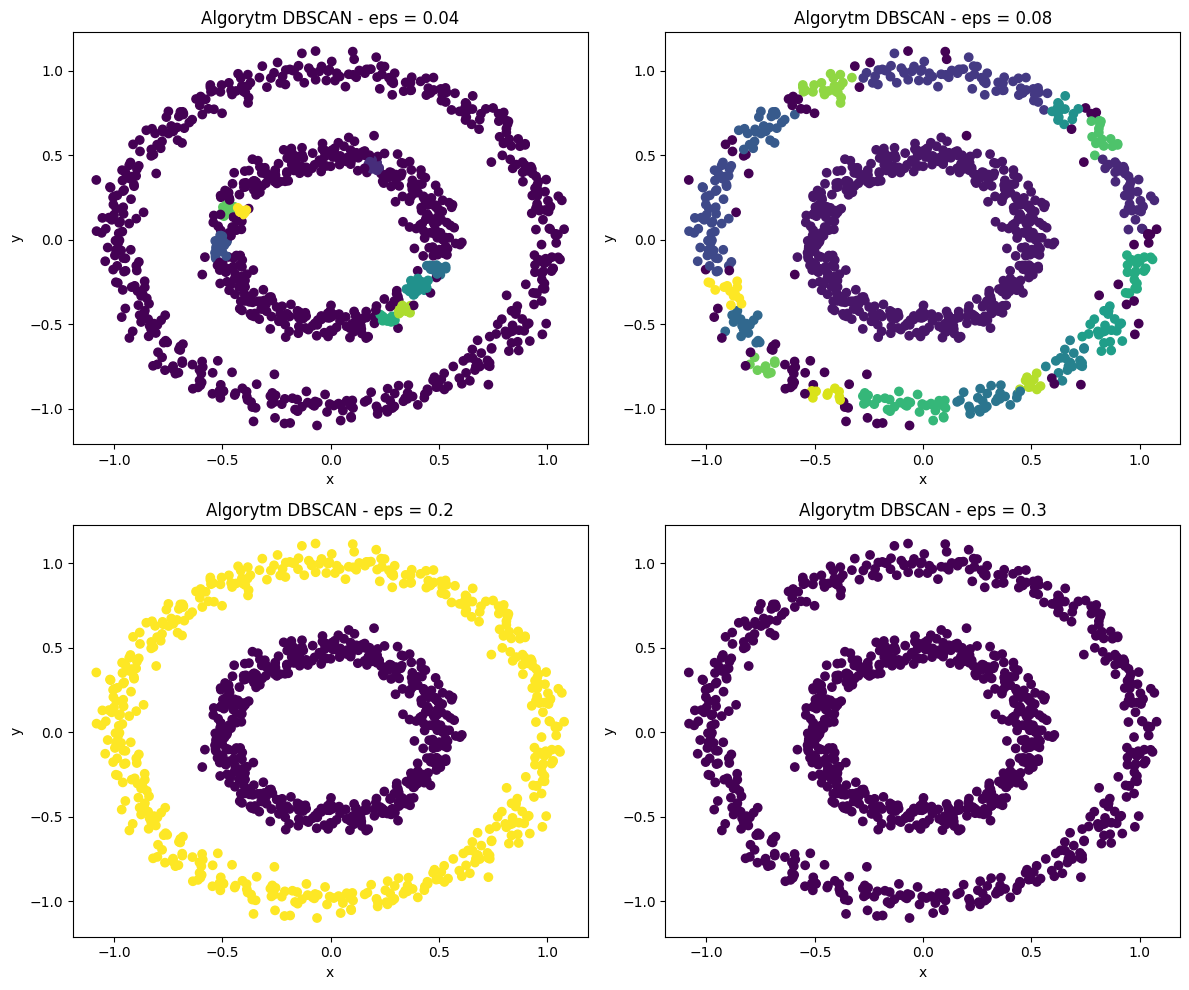

In [18]:
# DBSCAN
eps_values = [0.04, 0.08, 0.2, 0.3]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for eps, ax in zip(eps_values, axes.ravel()):
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan.fit(data)

    ax.scatter(data[:, 0], data[:, 1], c=dbscan.labels_)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Algorytm DBSCAN - eps = {eps}')

    if eps != 0.3:
      print("\neps = ", eps)
      silhouette = silhouette_score(data, dbscan.labels_)
      print("Silhouette Score:", round(silhouette,2))
      davies_bouldin = davies_bouldin_score(data, dbscan.labels_)
      print("Davies-Bouldin:", round(davies_bouldin,2))


plt.tight_layout()
plt.show()

### Wnioski dla algorytmu DBSCAN
Powyższe wykresy pokazują podział na klastry dla różnych wartości epsilon. Dla wartości za małych, eps < 1.1, klastrów tworzyło się dużo, zawierających tylko kilka punktów, dlatego zwiększyłam epsilon. Natomiast dla epsilon za dużego, eps > 2.2, tworzył się tylko 1 klaster zawierający wszystkie punkty. Dla wartości epsilon między 1.1 a 2.2, algorytm dzielił zbiór na dwa oddzielne okręgi i był to najlepszy podział. Współczynnik sylwetkowy dla eps = 0.2, wyniósł około 0.1 - znaczy to, że było blisko granicy decyzyjnej między dwoma sąsiednimi skupieniami. Jednak przypisanie ostatecznie było poprawne. Współczynnik Daviesa-Bouldina wyniósł bardzo dużo - aż 170 - może być to skutek tego, że klastry znajdują się jeden w drugim, są zagnieżdżone.

## Wnioski ogólne dla zadania 4.
Patrząc na wyniki graficzne, najlepszego podziału dokonał algorytm DBSCAN dla wartości epsilon równej 0.2 - oddzielił od siebie dwa okręgi. Jednak patrząc tylko na wartości metryk - współczynnika sylwetkowego oraz Daviesa-Bouldina - najlepsze wartości wyszły dla k-means oraz klasteryzacji hierarchicznej dla 4 klastrów.